In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from pyspark.sql import SparkSession
import csv
import pandas as pd

spark = SparkSession.builder.master("local").appName("lopputyo").getOrCreate()

df = spark.read.csv("exampleData.csv", header=True, inferSchema=True)


In [2]:
from pyspark.sql import functions as F
df.select(F.col("wetb"))
df.collect()[3]

df.select("wetb").count()
df.select("wetb").distinct() #Allows you to select only distinct values
df.select("wetb").distinct().count() #count of distinct values

df.selectExpr("wetb * 5 as newColumn", "round(air_temperature) as roundedTemper").show()
              
              
df0 = df.selectExpr("wetb as wetbulb")

+---------+-------------+
|newColumn|roundedTemper|
+---------+-------------+
|     45.0|          9.0|
|     37.0|          8.0|
|     37.0|          8.0|
|     37.5|          8.0|
|     36.5|          8.0|
|     35.0|          8.0|
|     34.0|          7.0|
|     30.0|          7.0|
|     31.0|          7.0|
|     30.5|          7.0|
|     30.5|          8.0|
|     33.0|          8.0|
|     39.0|         10.0|
|     35.0|          9.0|
|     40.0|         10.0|
|     37.5|          9.0|
|     35.5|          9.0|
|     33.0|          8.0|
|     35.5|          9.0|
|     34.0|          8.0|
+---------+-------------+
only showing top 20 rows



In [5]:
new_df = df.withColumn("air_temperature_rounded",F.round(df["air_temperature"],1))
df1 = df.selectExpr("cast(air_temperature as float) air_temperature")
df1.dtypes
#df_new.filter((F.col('air_temperature')<5)).show()
df_u = df.select("wetb")
df_i = df.select("air_temperature")
unionDF= df_u.union(df_i)
new_df.groupBy('precipitation').count().orderBy('count', ascending=False)
df.registerTempTable("example")
pr = spark.sql("Select air_temperature, count(air_temperature) AS total_freq, count(distinct air_temperature) AS unique_air_temp, count(wetb) AS wetb_freq,count(distinct wetb) AS unique_wetb FROM example GROUP BY air_temperature")
#pr.show()
new_df.show()

+---+-----------------+--------------+-------------+--------------+---------------+--------------+----+-----+-----+-----------------+------+--------------+----------+---------------+-------------------+-----------------------+
|_c0|         dateTime|indicator_rain|precipitation|indicator_temp|air_temperature|indicator_wetb|wetb|dewpt|vappr|relative_humidity|   msl|indicator_wdsp|wind_speed|indicator_wddir|wind_from_direction|air_temperature_rounded|
+---+-----------------+--------------+-------------+--------------+---------------+--------------+----+-----+-----+-----------------+------+--------------+----------+---------------+-------------------+-----------------------+
| 14|01-jan-1990 00:00|             0|          0.3|             0|            9.1|             0| 9.0|  8.9| 11.4|               99|1006.7|             2|         7|              2|                190|                    9.1|
| 15|01-jan-1990 01:00|             0|          0.2|             0|            8.2|         

c:\Lipasto\MassData23\mass_data_analysis_2023\venv\lib\site-packages\pyspark\sql\dataframe.py:330: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)


C:\Users\Miksu\AppData\Local\Temp\ipykernel_10936\2979089949.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')
C:\Users\Miksu\AppData\Local\Temp\ipykernel_10936\2979089949.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


<Axes: xlabel='precipitation', ylabel='air_temperature_rounded'>

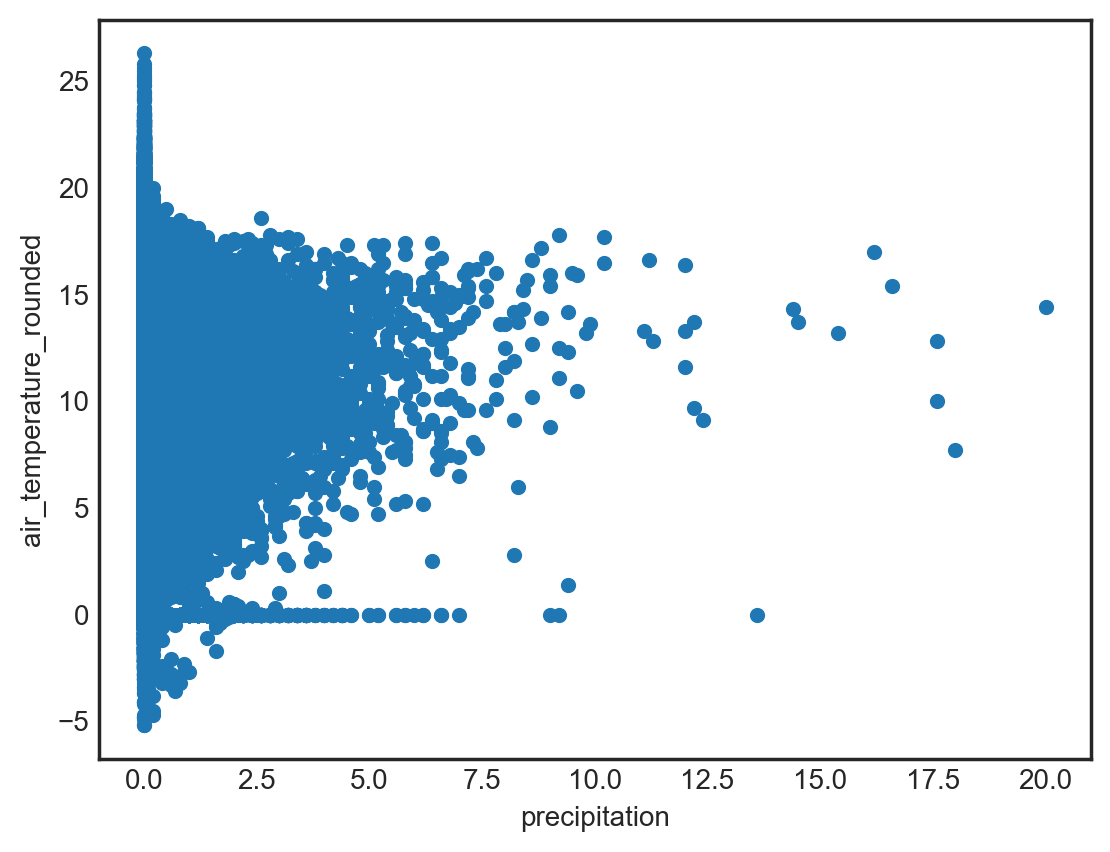

In [11]:
#df.show(vertical=True)
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.style.use('seaborn-white')
plt.style.use('seaborn-white')
dff = new_df.toPandas()
params = {'legend.fontsize': 'large', 'figure.figsize': (100, 80),'axes.labelsize': 'x-large','axes.titlesize':'x-large','xtick.labelsize':'large','ytick.labelsize':'large', 'ticker.MaxNLocator': 4}

#This will most likely give a type error because of dtype object, you can use the following code to convert object data to numerical type.
#This code should be called before the plot line above.
dff['precipitation'] = pd.to_numeric(dff.precipitation,errors='coerce')
dff['air_temperature_rounded'] = pd.to_numeric(dff.air_temperature_rounded,errors='coerce')

dff.plot(kind='scatter',x='precipitation',y='air_temperature_rounded')

C:\Users\Miksu\AppData\Local\Temp\ipykernel_10936\592245515.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')
C:\Users\Miksu\AppData\Local\Temp\ipykernel_10936\592245515.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


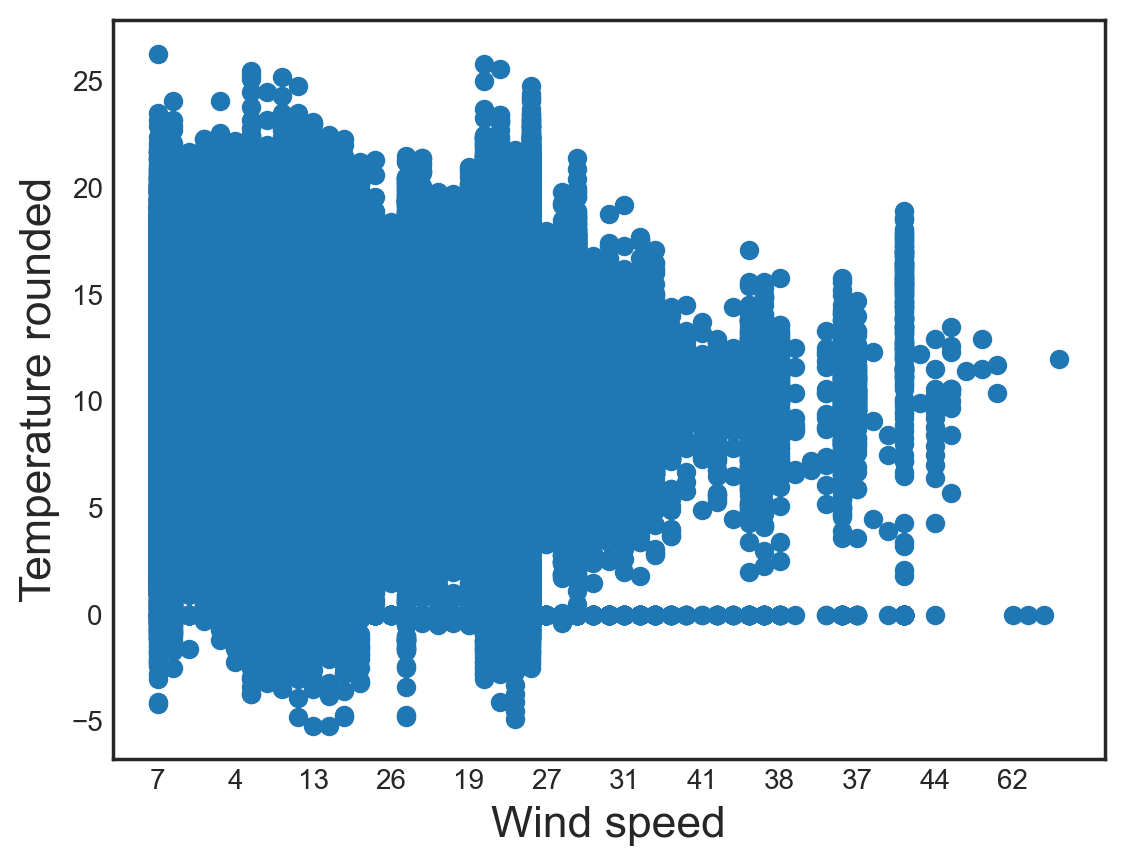

In [32]:
plt.style.use('seaborn-white')
plt.style.use('seaborn-white')
dff = new_df.toPandas()
params = {'legend.fontsize': 'large', 'figure.figsize': (100, 80),'axes.labelsize': 'x-large','axes.titlesize':'x-large','xtick.labelsize':'large','ytick.labelsize':'large', 'ticker.MaxNLocator': 4}

#This will most likely give a type error because of dtype object, you can use the following code to convert object data to numerical type.
#This code should be called before the plot line above.
dff['precipitation'] = pd.to_numeric(dff.precipitation,errors='coerce')
dff['air_temperature_rounded'] = pd.to_numeric(dff.air_temperature_rounded,errors='coerce')

tick_spacing = 5

fig, ax = plt.subplots(1,1)


ax.scatter(dff["wind_speed"], dff["air_temperature_rounded"])
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xlabel("Wind speed", fontsize=16)
plt.ylabel("Temperature rounded", fontsize=16)
plt.show()

C:\Users\Miksu\AppData\Local\Temp\ipykernel_10936\906151593.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')
C:\Users\Miksu\AppData\Local\Temp\ipykernel_10936\906151593.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


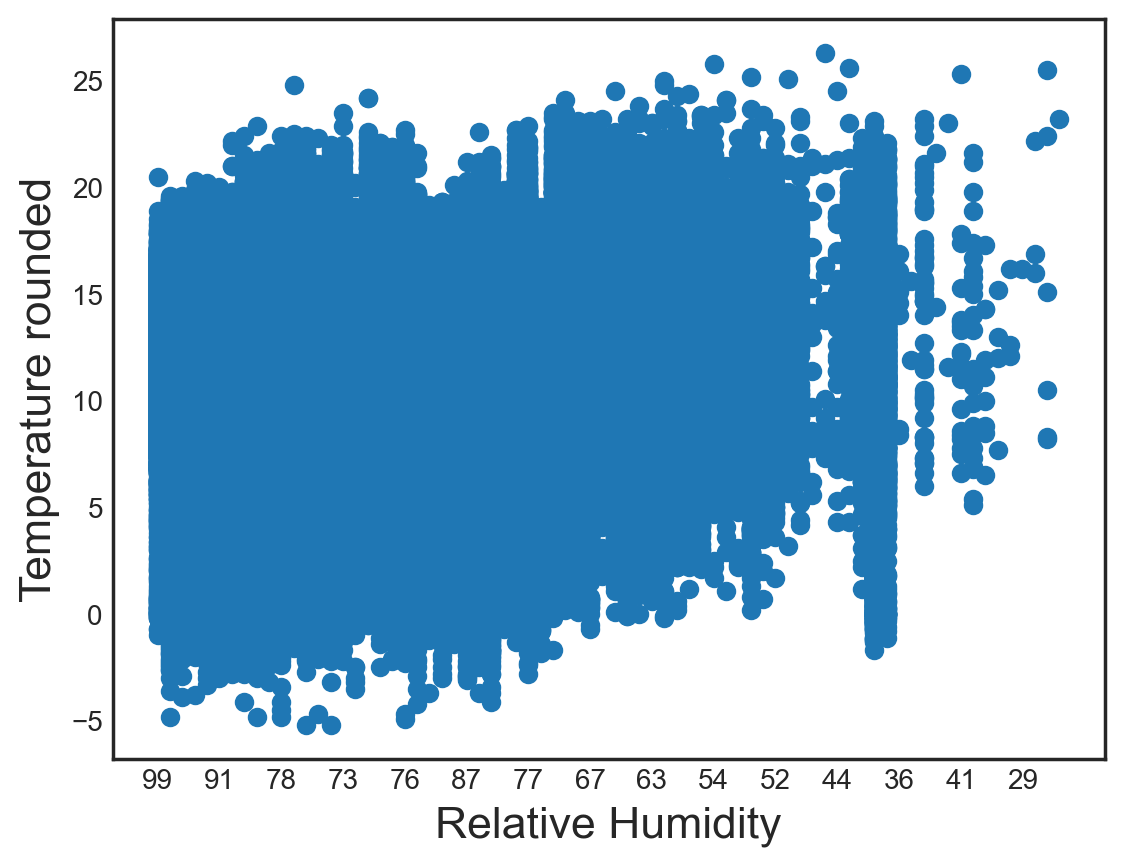

In [30]:
plt.style.use('seaborn-white')
plt.style.use('seaborn-white')
import numpy as np
dff = new_df.toPandas()
params = {'legend.fontsize': 'large', 'figure.figsize': (100, 80),'axes.labelsize': 'x-large','axes.titlesize':'x-large','xtick.labelsize':'large','ytick.labelsize':'large', 'ticker.MaxNLocator': 4}

#This will most likely give a type error because of dtype object, you can use the following code to convert object data to numerical type.
#This code should be called before the plot line above.
dff['precipitation'] = pd.to_numeric(dff.precipitation,errors='coerce')
dff['air_temperature_rounded'] = pd.to_numeric(dff.air_temperature_rounded,errors='coerce')

tick_spacing = 5

fig, ax = plt.subplots(1,1)


ax.scatter(dff["relative_humidity"], dff["air_temperature_rounded"])
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xlabel("Relative Humidity", fontsize=16)
plt.ylabel("Temperature rounded", fontsize=16)
plt.show()
#dff.plot(kind='scatter',x='relative_humidity',y='air_temperature_rounded')
#dff.xticks(4)

In [13]:
df.createOrReplaceTempView("weatherConditions")
staticSchema = df.schema
from pyspark.sql import functions as F
df.filter((F.col('air_temperature')<5))

DataFrame[_c0: int, dateTime: string, indicator_rain: int, precipitation: string, indicator_temp: int, air_temperature: string, indicator_wetb: int, wetb: string, dewpt: string, vappr: string, relative_humidity: string, msl: string, indicator_wdsp: int, wind_speed: string, indicator_wddir: int, wind_from_direction: int]

In [14]:
streamingDF = spark.readStream\
.schema(staticSchema)\
.option("maxFilesPerTrigger", "Require numeric value i.e. if you have more than 1 file/feed coming from source, how much you want to read ? 1,2,3?")\
.format("Require file format")\
.option("header", "true")\
.load("exampleData.csv")

Py4JJavaError: An error occurred while calling o155.load.
: org.apache.spark.SparkClassNotFoundException: [DATA_SOURCE_NOT_FOUND] Failed to find the data source: Require file format. Please find packages at `https://spark.apache.org/third-party-projects.html`.
	at org.apache.spark.sql.errors.QueryExecutionErrors$.dataSourceNotFoundError(QueryExecutionErrors.scala:738)
	at org.apache.spark.sql.execution.datasources.DataSource$.lookupDataSource(DataSource.scala:647)
	at org.apache.spark.sql.streaming.DataStreamReader.loadInternal(DataStreamReader.scala:157)
	at org.apache.spark.sql.streaming.DataStreamReader.load(DataStreamReader.scala:211)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:76)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:52)
	at java.base/java.lang.reflect.Method.invoke(Method.java:578)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:1589)
Caused by: java.lang.ClassNotFoundException: Require file format.DefaultSource
	at java.base/java.net.URLClassLoader.findClass(URLClassLoader.java:445)
	at java.base/java.lang.ClassLoader.loadClass(ClassLoader.java:588)
	at java.base/java.lang.ClassLoader.loadClass(ClassLoader.java:521)
	at org.apache.spark.sql.execution.datasources.DataSource$.$anonfun$lookupDataSource$5(DataSource.scala:633)
	at scala.util.Try$.apply(Try.scala:213)
	at org.apache.spark.sql.execution.datasources.DataSource$.$anonfun$lookupDataSource$4(DataSource.scala:633)
	at scala.util.Failure.orElse(Try.scala:224)
	at org.apache.spark.sql.execution.datasources.DataSource$.lookupDataSource(DataSource.scala:633)
	... 14 more
